In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px
import numpy.polynomial.polynomial as poly

In [11]:
# VDV - Kaina, rida, amžius, variklio galia/tūris
# eletrinis - kaina, rida, amžius, baterijos talpa, atstumas

# Bendri parametrai - markė, modelis, mechaninė/automatinė, kėbulo tipas, kuras, varantieji ratai(2 ar 4x4)

# 1. Pasidaryti vienai markei ir pabandyti pritaikyti įvairius kriterijus

# Bendrieji parametrai nufiltruos dataframą
# surasti skaitinius parametrus kurie koreliuoja, tada jiems pritaikyti fn_fit funkcijas,
# surasti ir išvesti vidurkį.

In [12]:
SDB = sqlite3.connect('../../DATA/WEBscr.db')
C = SDB.cursor()

sql1="""select * from TAutos;"""
df1 = pd.read_sql_query(sql1, con=SDB)

sql2="""select * from TUrl;"""
df2 = pd.read_sql_query(sql2, con=SDB)

SDB.close()


In [13]:
print(df1.columns)
print(df2.columns)

Index(['id', 'gamintojas', 'Pirma registracija', 'Kuro tipas', 'Kėbulo tipas',
       'Durų skaičius', 'Pavarų dėžė', 'id_', 'auto', 'Rida',
       'Taršos mokestis', 'Variklis', 'Elektra nuvažiuojamas atstumas',
       'Tech. apžiūra iki', 'Baterijos talpa, kWh', 'Spalva',
       'Bendroji masė, kg', 'Varantieji ratai', 'Klimato valdymas',
       'Ratlankių skersmuo', 'Nuosava masė, kg', 'Sėdimų vietų skaičius',
       'Pirmosios registracijos šalis', 'Kėbulo numeris (VIN)',
       'Euro standartas', 'CO₂ emisija, g/km', 'Defektai', 'Pagaminimo data',
       'Vairo padėtis', 'Registracijos data', 'Ilgis', 'Aukštis'],
      dtype='object')
Index(['id', 'url', 'name', 'params'], dtype='object')


In [14]:
df_with_dubs = pd.merge(df1, df2, on='id', how='inner')
df = df_with_dubs.drop_duplicates()
df.head()

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,"CO₂ emisija, g/km",Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis,url,name,params
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...
2,26631227,-Kita-,2020-02,Elektra,Hečbekas,2/3,None,Skelbimo ID: A26631227,"-Kita- -kita-, hečbekas",14 000 km,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-hecbe...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...
3,26331698,-Kita-,2024,Elektra,Krovininis mikroautobusas,4/5,None,Skelbimo ID: A26331698,"-Kita- -kita-, 41 kWh, krovininis mikroautobusas",None,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-41-kw...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...
4,25604691,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",75 000 km,...,148 g/km,None,None,None,None,None,None,https://autoplius.lt/skelbimai/abarth-124-spid...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...


In [15]:
df.columns

Index(['id', 'gamintojas', 'Pirma registracija', 'Kuro tipas', 'Kėbulo tipas',
       'Durų skaičius', 'Pavarų dėžė', 'id_', 'auto', 'Rida',
       'Taršos mokestis', 'Variklis', 'Elektra nuvažiuojamas atstumas',
       'Tech. apžiūra iki', 'Baterijos talpa, kWh', 'Spalva',
       'Bendroji masė, kg', 'Varantieji ratai', 'Klimato valdymas',
       'Ratlankių skersmuo', 'Nuosava masė, kg', 'Sėdimų vietų skaičius',
       'Pirmosios registracijos šalis', 'Kėbulo numeris (VIN)',
       'Euro standartas', 'CO₂ emisija, g/km', 'Defektai', 'Pagaminimo data',
       'Vairo padėtis', 'Registracijos data', 'Ilgis', 'Aukštis', 'url',
       'name', 'params'],
      dtype='object')

In [16]:
gamintojai = sorted(list(set(df['gamintojas'].tolist())))

print(gamintojai)

['-Kita-', 'Abarth', 'Acura', 'Aiways', 'Aixam', 'Alfa Romeo', 'Alpina', 'Aston Martin', 'Audi', 'Austin Rover', 'Austin-Healey', 'BMW', 'BYD', 'Bentley', 'Bolloré', 'Buick', 'Cadillac', 'Cenntro', 'Chevrolet', 'Chrysler', 'Citroen', 'Cupra', 'DS Automobiles', 'Dacia', 'Daihatsu', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'GAZ', 'GMC', 'GWM', 'Great Wall', 'Honda', 'Hudson', 'Hummer', 'Hyundai', 'Ineos', 'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'KGM', 'Kia', 'LDV', 'Lada', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus', 'Ligier', 'Lincoln', 'LuAZ', 'Lucid', 'Lynk & Co', 'MAN', 'MG', 'Maserati', 'Maxus', 'Maybach', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Microcar', 'Mini', 'Mitsubishi', 'Moskvich', 'NIO', 'Nissan', 'Opel', 'Panther', 'Paxster', 'Peugeot', 'Plymouth', 'Polestar', 'Pontiac', 'Porsche', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Scion', 'Seat', 'Seres', 'Skoda', 'Smart', 'SsangYong', 'Subaru', 'Suzuki', 'Tatra', 'Tazzari', 'Tesla', 'Toyota', 'Triumph', 'UAZ', 'Vauxhall', '

In [17]:
gamintojai_kiekiai =df['gamintojas'].value_counts()
g = gamintojai_kiekiai[gamintojai_kiekiai.values >= 10]
gamintojai = sorted(list(g.index))

kuro_tipai = sorted(list(set(df['Kuro tipas'].tolist())))

pavaros =list(set(df['Pavarų dėžė'].tolist()))

kebulo_tipai = sorted(list(set(df[df['Kėbulo tipas'].notna()]['Kėbulo tipas'].tolist())))
amziai = sorted(list(set(df[df['amzius'].notna()]['amzius'].tolist())))
print(amziai)

KeyError: 'amzius'

In [18]:
def get_kaina(x):
    kaina = x.split(';')[-1].split('\n')[0].replace(' ', '').replace('€', '')
    return int(kaina)

df['kaina'] = df['params'].apply(get_kaina)

def amzius(x):
    if x != None:
        return int(2024 - int(x[:4]))
    
df['amzius'] = df['Pirma registracija'].apply(amzius)

def rida(x):
    if x != None:
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return np.nan
    
df['rida'] = df['Rida'].apply(rida)


def galia(x):
    if x != None:
        if 'kW' in x:
            return int(x.split('(')[-1][:-3])
    else:
        return np.nan

df['galia'] = df['Variklis'].apply(galia)    

def baterija(x):
    if x != None:
        return int(x.replace(' ', '').replace('kWh', ''))
    
df['baterija'] = df['Baterijos talpa, kWh'].apply(baterija)  


def eatstumas(x):
    if x != None:
        return int(x.replace(' ', '').replace('km', ''))
    
df['eatstumas'] = df['Elektra nuvažiuojamas atstumas'].apply(eatstumas)

df['R5000'] = df[df['rida'] != None]['rida'].apply(lambda x: float(np.ceil(x/5000) * 5000))
df['ea50'] = df[df['eatstumas'] != None]['eatstumas'].apply(lambda x: float(np.ceil(x/50) * 50))
df.head()

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,name,params,kaina,amzius,rida,galia,baterija,eatstumas,R5000,ea50
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,1750,16.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,3900,13.0,10.0,NaN,NaN,NaN,5000.0,NaN
2,26631227,-Kita-,2020-02,Elektra,Hečbekas,2/3,None,Skelbimo ID: A26631227,"-Kita- -kita-, hečbekas",14 000 km,...,-Kita-,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,6800,4.0,14000.0,29.0,NaN,150.0,15000.0,150.0
3,26331698,-Kita-,2024,Elektra,Krovininis mikroautobusas,4/5,None,Skelbimo ID: A26331698,"-Kita- -kita-, 41 kWh, krovininis mikroautobusas",None,...,-Kita-,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,60500,0.0,NaN,66.0,41.0,200.0,NaN,200.0
4,25604691,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",75 000 km,...,Abarth,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,18900,7.0,75000.0,125.0,NaN,NaN,75000.0,NaN


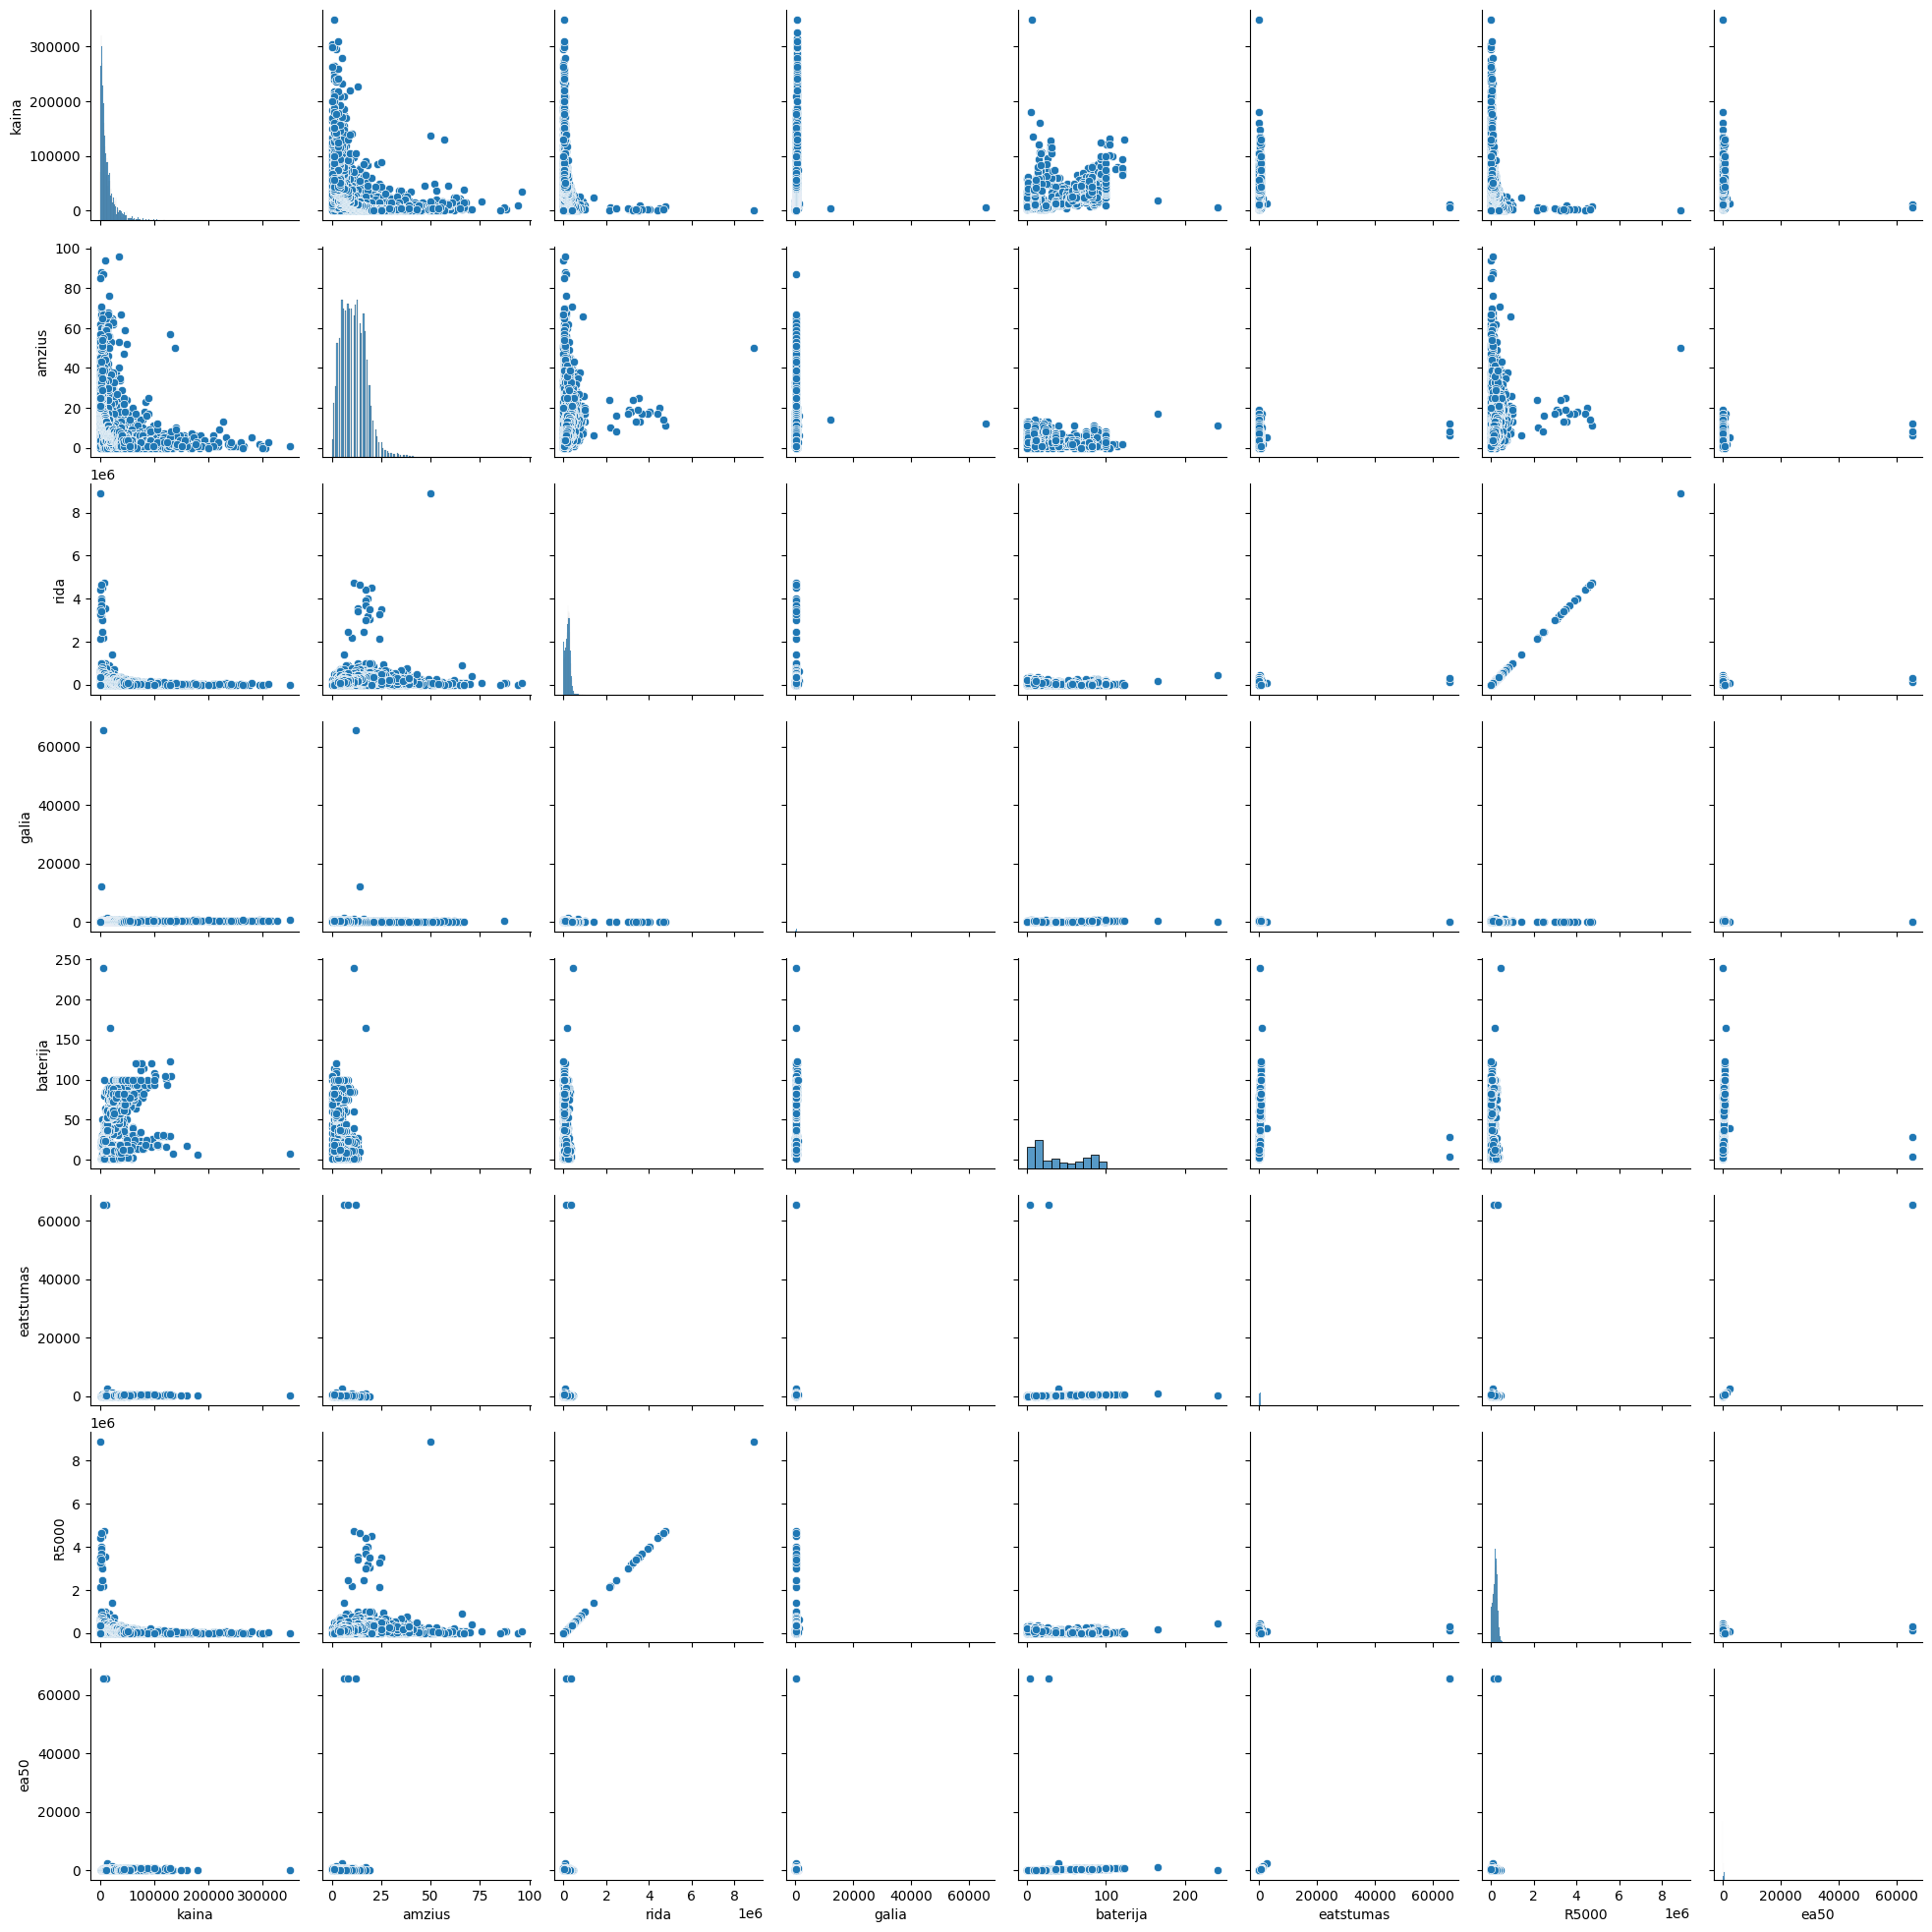

In [ ]:
sns.pairplot(data=df)

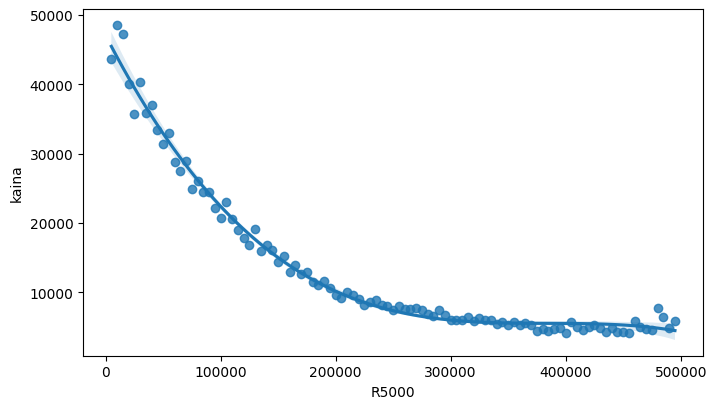

In [ ]:
df_rida = df[['kaina', 'R5000']]
df_rida.dropna(inplace=True)
df_rida_gr = df_rida.groupby('R5000').mean(numeric_only=True).reset_index()

df_rida_gr2 = df_rida_gr[df_rida_gr['R5000'] < 500000]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_rida_gr2, x='R5000', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()

In [ ]:
coef = np.polyfit(x=df_rida_gr2['R5000'], y=df_rida_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
rida_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

r = 300000
rida_t_kaina = rida_fit(r)
print(rida_t_kaina)

[-7.28482141e-13  8.39889914e-07 -3.23236327e-01  4.70656600e+04]
6015.836400529195


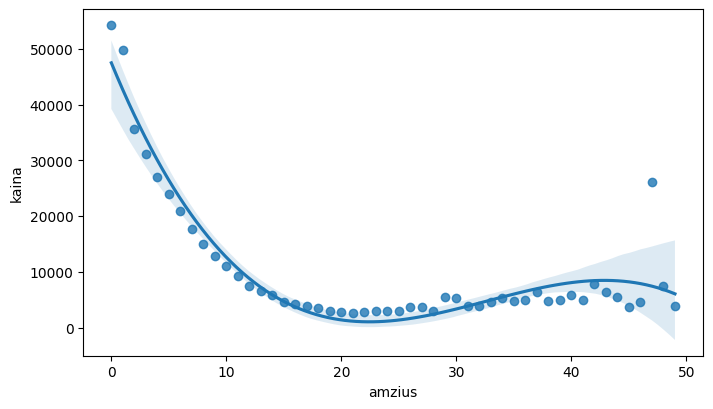

[-1.74035953e+00  1.70417811e+02 -5.01721337e+03  4.74947985e+04]
4706.8919150153015


In [ ]:
df_amzius = df[['kaina', 'amzius']]
df_amzius.dropna(inplace=True)
df_amzius_gr = df_amzius.groupby('amzius').mean(numeric_only=True).reset_index()

df_amzius_gr2 = df_amzius_gr[df_amzius_gr['amzius'] < 50]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_amzius_gr2, x='amzius', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_amzius_gr2['amzius'], y=df_amzius_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
amzius_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

a = 15
amzius_t_kaina = amzius_fit(a)
print(amzius_t_kaina)

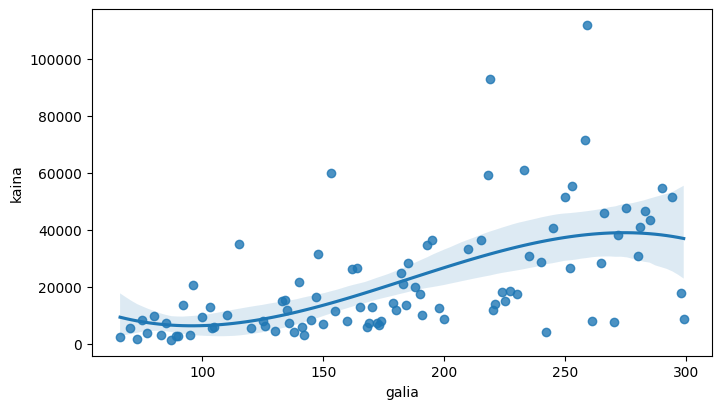

[-1.14527790e-02  6.35752560e+00 -9.02253903e+02  4.45041155e+04]
11369.645318085182


In [ ]:
# df_galia = df[(df['gamintojas'] == 'BMW') & (df['amzius'] == 5) & (df['R5000'] == 160000)][['kaina', 'galia']]
df_galia = df[(df['gamintojas'] == 'BMW')][['kaina', 'galia']]
df_galia.dropna(inplace=True)
df_galia_gr = df_galia.groupby('galia').mean(numeric_only=True).reset_index()

# df_galia_gr2 = df_galia_gr
df_galia_gr2 = df_galia_gr[df_galia_gr['galia'] < 300]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_galia_gr2, x='galia', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_galia_gr2['galia'], y=df_galia_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
galia_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

g = 140
galia_t_kaina = galia_fit(g)
print(galia_t_kaina)

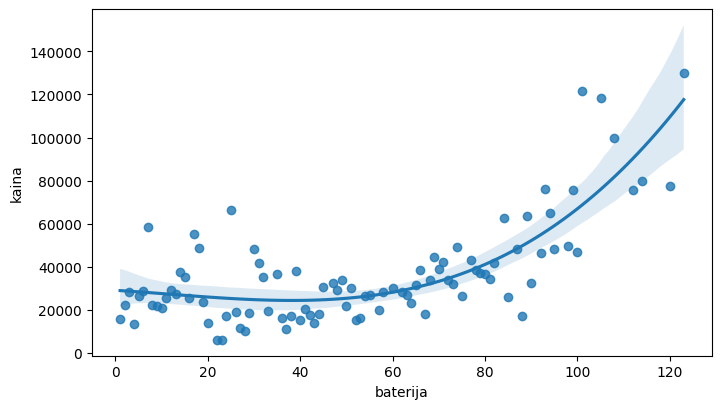

[ 7.89600433e-02 -2.79073408e+00 -1.31924644e+02  2.91036509e+04]
41116.523415122894


In [ ]:
df_baterija = df[['kaina', 'baterija']]
df_baterija.dropna(inplace=True)
df_baterija_gr = df_baterija.groupby('baterija').mean(numeric_only=True).reset_index()

# df_baterija_gr2 = df_baterija_gr
df_baterija_gr2 = df_baterija_gr[df_baterija_gr['baterija'] < 150]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_baterija_gr2, x='baterija', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_baterija_gr2['baterija'], y=df_baterija_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
baterija_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

b = 80
baterija_t_kaina = baterija_fit(b)
print(baterija_t_kaina)

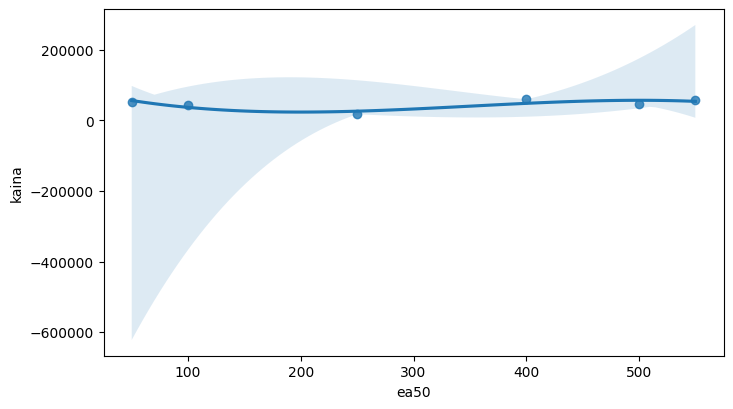

[-2.44538601e-03  2.56646161e+00 -7.31640175e+02  8.70279707e+04]
57150.03466958612


In [ ]:
df_eatstumas = df[(df['gamintojas'] == 'BMW') & (df['amzius'] == 2)][['kaina', 'ea50']]
df_eatstumas.dropna(inplace=True)
df_eatstumas_gr = df_eatstumas.groupby('ea50').mean(numeric_only=True).reset_index()

# df_eatstumas_gr2 = df_eatstumas_gr
df_eatstumas_gr2 = df_eatstumas_gr[df_eatstumas_gr['ea50'] < 700]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.regplot(data=df_eatstumas_gr2, x='ea50', y='kaina', order=3)
# axis.axhline(y=0)
plt.show()


coef = np.polyfit(x=df_eatstumas_gr2['ea50'], y=df_eatstumas_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
print(coef)
eatstumas_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

b = 500
eatstumas_t_kaina = eatstumas_fit(b)
print(eatstumas_t_kaina)

In [ ]:
kiek_auto = df[(df['gamintojas'] == 'Alfa Romeo') & (df['amzius'] == 4)][['gamintojas']].count()
if kiek_auto.values > 10:
    print('labai gerai')
    print(kiek_auto.values)
else:
    print('per mazai')
    print(kiek_auto.values)

per mazai
[5]


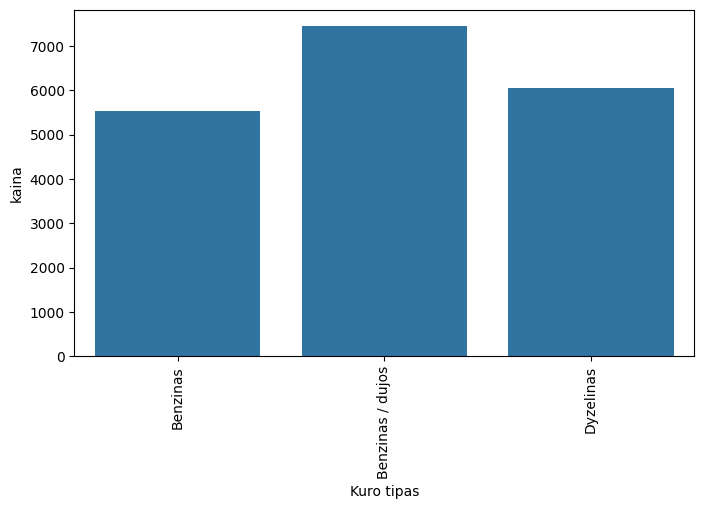

In [ ]:
df_kuras = df[(df['gamintojas'] == 'BMW') & (df['amzius'] == 15)][['kaina', 'Kuro tipas']]
df_kuras.dropna(inplace=True)
df_kuras_gr = df_kuras.groupby('Kuro tipas').mean(numeric_only=True).reset_index()

df_kuras_gr2 = df_kuras_gr
# df_kuras_gr2 = df_kuras_gr[df_kuras_gr['baterija'] < 150]

fig, axis = plt.subplots(figsize=(8, 4.5))
sns.barplot(data=df_kuras_gr2, x='Kuro tipas', y='kaina')
axis.tick_params(axis='x', rotation=90)
# axis.axhline(y=0)
plt.show()


# coef = np.polyfit(x=df_baterija_gr2['baterija'], y=df_baterija_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
# print(coef)
# baterija_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija

# b = 80
# baterija_t_kaina = baterija_fit(b)
# print(baterija_t_kaina)

In [ ]:
gamintojas = 'Mercedes-Benz'
amzius = 2
rida= 50000
kuras= 'Benzinas'
pavara = 'Automatinė'
kebulas = 'Komercinis'

df_rida = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius)][['kaina', 'R5000']]
df_rida.dropna(inplace=True)
df_rida_gr = df_rida.groupby('R5000').mean(numeric_only=True).reset_index()
df_rida_gr2 = df_rida_gr[df_rida_gr['R5000'] < 500000]
coef = np.polyfit(x=df_rida_gr2['R5000'], y=df_rida_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
rida_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija
rida_t_kaina = rida_fit(rida)

df_kuras = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Kuro tipas'] == kuras)][['kaina', 'Kuro tipas']]
df_kuras_gr = df_kuras.groupby('Kuro tipas').mean(numeric_only=True).reset_index()
df_kuras_gr
kuras_t_kaina = df_kuras_gr.iloc[0, 1]

df_pavara = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Pavarų dėžė'] == pavara)][['kaina', 'Pavarų dėžė']]
df_pavara_gr = df_pavara.groupby('Pavarų dėžė').mean(numeric_only=True).reset_index()
pavara_t_kaina = df_pavara_gr.iloc[0, 1]

# df_kebulas = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Kėbulo tipas'] == kebulas)][['kaina', 'Kėbulo tipas']]
df_kebulas = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius)][['kaina', 'Kėbulo tipas']]
df_kebulas_gr = df_kebulas.groupby('Kėbulo tipas').mean(numeric_only=True).reset_index()
df_kebulas_gr
# kebulas_t_kaina = df_kebulas_gr.iloc[0, 1]

# t_kaina = round(sum([rida_t_kaina, kuras_t_kaina, pavara_t_kaina, kebulas_t_kaina]) / 4)

# print(f'Rida kaina {rida_t_kaina}')
# print(f'kuras kaina {kuras_t_kaina}')
# print(f'pavara kaina {pavara_t_kaina}')
# print(f'kebulas kaina {kebulas_t_kaina}')
# print(f'tiketina kaina {t_kaina}')

,Kėbulo tipas,kaina
0,Hečbekas,58681.666667
1,Keleivinis mikroautobusas,60281.333333
2,Komercinis,13850.000000
3,Krovininis mikroautobusas,27671.250000
4,Kupė (Coupe),65499.500000
5,Limuzinas,131500.000000
6,Sedanas,57110.238095
7,Universalas,35621.125000
8,Vienatūris,52075.000000
9,Visureigis / Krosoveris,59452.392857


In [ ]:
gamintojai= 'Aixam'
kebulo_tipai = ['--pasirinkite--'] + sorted(list(set(df[(df['Pavarų dėžė'].notna()) & (df['gamintojas'] == gamintojai)]['Pavarų dėžė'].tolist())))
print(kebulo_tipai)

['--pasirinkite--', 'Automatinė']


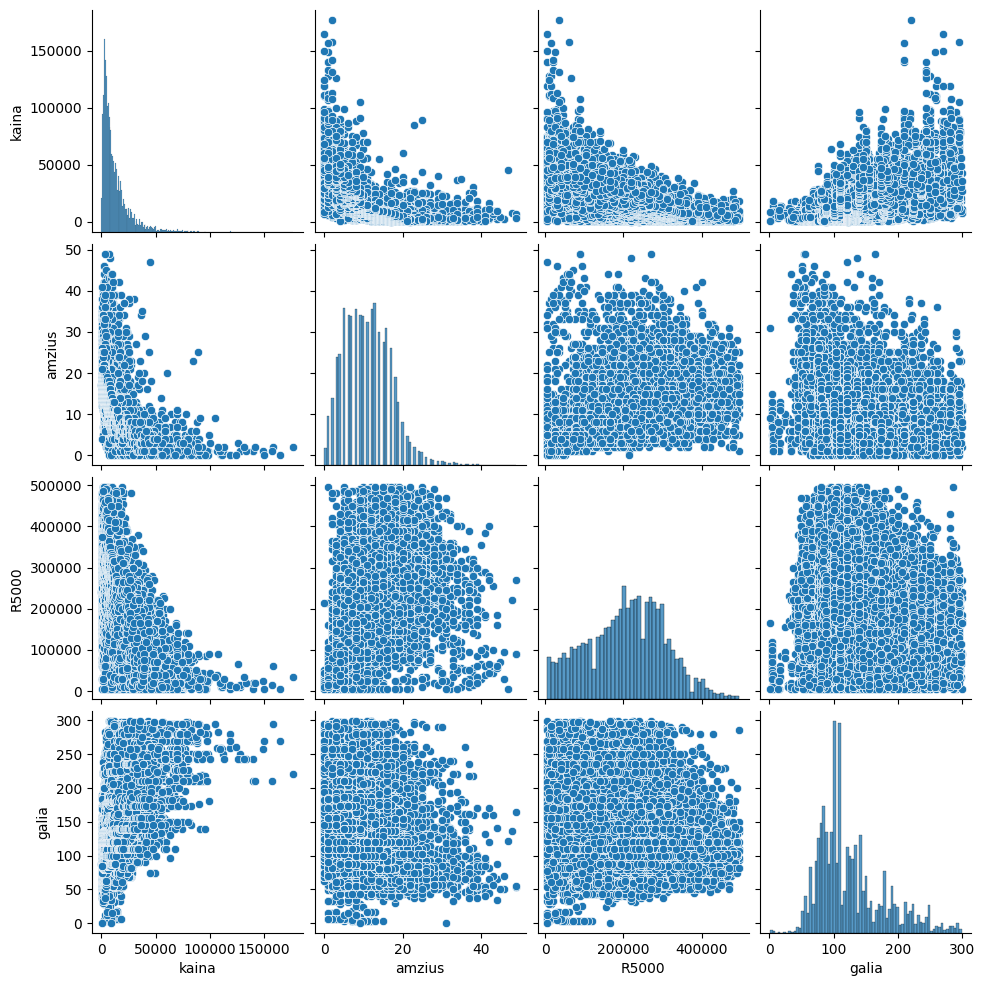

In [ ]:
df2 = df[(df['R5000'] < 500000) & (df['amzius'] < 50) & (df['galia'] < 300)][['kaina', 'amzius', 'R5000', 'galia']]

sns.pairplot(data=df2)

In [ ]:
df.head()

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,params,kaina,amzius,rida,galia,baterija,eatstumas,R5000,ea50,id_numeric
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,1750,16.0,NaN,NaN,NaN,NaN,NaN,NaN,11747
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,3900,13.0,10.0,NaN,NaN,NaN,5000.0,NaN,4296
2,26631227,-Kita-,2020-02,Elektra,Hečbekas,2/3,None,Skelbimo ID: A26631227,"-Kita- -kita-, hečbekas",14 000 km,...,-Kita- -kita-;2020-02;Hečbekas;Elektra;Automat...,6800,4.0,14000.0,29.0,NaN,150.0,15000.0,150.0,13771
3,26331698,-Kita-,2024,Elektra,Krovininis mikroautobusas,4/5,None,Skelbimo ID: A26331698,"-Kita- -kita-, 41 kWh, krovininis mikroautobusas",None,...,-Kita- -kita-;2024;Krovininis mikroautobusas;E...,60500,0.0,NaN,66.0,41.0,200.0,NaN,200.0,7609
4,25604691,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",75 000 km,...,Abarth 124 Spider;2017;Kabrioletas;Benzinas;Me...,18900,7.0,75000.0,125.0,NaN,NaN,75000.0,NaN,2921


In [22]:
df3 = df[['id', 'gamintojas', 'amzius', 'rida', 'Kuro tipas', 'Pavarų dėžė', 'Kėbulo tipas', 'galia']]
df3.dropna(inplace=True)
df3.head()

,id,gamintojas,amzius,rida,Kuro tipas,Pavarų dėžė,Kėbulo tipas,galia
4,25604691,Abarth,7.0,75000.0,Benzinas,Mechaninė,Kabrioletas,125.0
5,25741890,Acura,11.0,217262.0,Benzinas,Automatinė,Visureigis / Krosoveris,221.0
6,23761557,Acura,14.0,76055.0,Benzinas,Automatinė,Sedanas,224.0
7,26786659,Acura,20.0,230000.0,Benzinas,Automatinė,Visureigis / Krosoveris,193.0
8,26780769,Acura,16.0,200000.0,Benzinas,Automatinė,Visureigis / Krosoveris,220.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27406 entries, 4 to 36792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            27406 non-null  object 
 1   gamintojas    27406 non-null  object 
 2   amzius        27406 non-null  float64
 3   rida          27406 non-null  float64
 4   Kuro tipas    27406 non-null  object 
 5   Pavarų dėžė   27406 non-null  object 
 6   Kėbulo tipas  27406 non-null  object 
 7   galia         27406 non-null  float64
 8   id_numeric    27406 non-null  int16  
dtypes: float64(3), int16(1), object(5)
memory usage: 1.9+ MB


In [21]:
def preliminari_kaina(gamintojas, amzius, rida, kuras, pavara, kebulas, galia):
    df_rida = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius)][['kaina', 'R5000']]
    df_rida.dropna(inplace=True)
    df_rida_gr = df_rida.groupby('R5000').mean(numeric_only=True).reset_index()
    df_rida_gr2 = df_rida_gr[df_rida_gr['R5000'] < 500000]
    coef = np.polyfit(x=df_rida_gr2['R5000'], y=df_rida_gr2['kaina'], deg=3) # grazina koeficientas is desines i kaire
    rida_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija
    rida_t_kaina = rida_fit(rida)

    df_kuras = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Kuro tipas'] == kuras)][['kaina', 'Kuro tipas']]
    df_kuras_gr = df_kuras.groupby('Kuro tipas').mean(numeric_only=True).reset_index()
    kuras_t_kaina = df_kuras_gr.iloc[0, 1]

    df_pavara = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Pavarų dėžė'] == pavara)][['kaina', 'Pavarų dėžė']]
    df_pavara_gr = df_pavara.groupby('Pavarų dėžė').mean(numeric_only=True).reset_index()
    pavara_t_kaina = df_pavara_gr.iloc[0, 1]

    df_kebulas = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius) & (df['Kėbulo tipas'] == kebulas)][['kaina', 'Kėbulo tipas']]
    df_kebulas_gr = df_kebulas.groupby('Kėbulo tipas').mean(numeric_only=True).reset_index()
    kebulas_t_kaina = df_kebulas_gr.iloc[0, 1]
    
    df_galia = df[(df['gamintojas'] == gamintojas) & (df['amzius'] == amzius)][['kaina', 'galia']]
    df_galia.dropna(inplace=True)
    df_galia_gr = df_galia.groupby('galia').mean(numeric_only=True).reset_index()
    df_galia_gr2 = df_galia_gr[df_galia_gr['galia'] < 300]
    coef = np.polyfit(x=df_galia_gr2['galia'], y=df_galia_gr2['kaina'], deg=3)
    galia_fit = poly.Polynomial(coef[::-1]) # pasiradem funkcija
    galia_t_kaina = galia_fit(galia)
    
    
    t_kaina = round(sum([rida_t_kaina, kuras_t_kaina, pavara_t_kaina, kebulas_t_kaina, galia_t_kaina]) / 5)
    print(t_kaina)
    return t_kaina

df3['id_numeric'] = df3['id'].astype('category').cat.codes + 1

# df3['kaina_spejama'] = df3.apply(lambda row: preliminari_kaina(row['gamintojas'], row['amzius'], row['rida'], row['Kuro tipas'], row['Pavarų dėžė'], row['Kėbulo tipas'], row['galia']) if pd.notna(row['gamintojas']) and pd.notna(row['amzius']) and pd.notna(row['rida']) and pd.notna(row['Kuro tipas']) and pd.notna(row['Pavarų dėžė']) and pd.notna(row['Kėbulo tipas']) and pd.notna(row['galia']) else np.nan, axis=1)
df3['kaina_spejama'] = df3.apply(lambda row: preliminari_kaina(row['gamintojas'], row['amzius'], row['rida'], row['Kuro tipas'], row['Pavarų dėžė'], row['Kėbulo tipas'], row['galia']), axis=1)




18900
9066
11335
1500
6500
10809
20561
22101
27239
27999
29200
2922
7436
10686
5515
5935
5030
7707
6347
4680
4410
4456
5500
7703
1821
2222
6253
17712
18714
16602
21302
17974
227597
1574
1808
2160
2232
2344
2443
8002
11797
14984
16344
18503
18635
31589
32733
32274
33514
34721
52277
61215
2279
1160
1254
984
2152
2102
3173
1821
2185
1994
1854
2652
2369
3150
1819
2837
2700
3841
4044
4750
4198
8000
14753
17558
12021
15957
16750
21456
21401
23452
13465
18822
19505
20611
23404
19555
20997
27623
30781
31844
221336
990
1205
1893
1728
2051
1599
2160
1944
2164
2002
2624
1995
2514
3181
2490
2465
2998
2317
2020
2094
3395
3493
3572
2565
3854
10961
7313
11415
15621
14838
12794
18775
20187
21868
19518
28985
20612
28410
30173
30436
33314
32394
10431
226076
10930


TypeError: expected non-empty vector for x

In [24]:
for index, row in df3.iterrows():
    print(index, preliminari_kaina(row['gamintojas'], row['amzius'], row['rida'], row['Kuro tipas'], row['Pavarų dėžė'], row['Kėbulo tipas'], row['galia']))

18900
4 18900
9066
5 9066
11335
6 11335
1500
7 1500
6500
8 6500
10809
9 10809
20561
10 20561
22101
11 22101
27239
12 27239
27999
13 27999
29200
14 29200
2922
18 2922
7436
19 7436
10686
20 10686
5515
25 5515
5935
26 5935
5030
27 5030
7707
28 7707
6347
31 6347
4680
39 4680
4410
40 4410
4456
41 4456
5500
43 5500
7703
46 7703
1821
47 1821
2222
48 2222
6253
49 6253
17712
50 17712
18714
51 18714
16602
52 16602
21302
53 21302
17974
54 17974
227597
55 227597
1574
56 1574
1808
57 1808
2160
58 2160
2232
59 2232
2344
60 2344
2443
61 2443
8002
62 8002
11797
63 11797
14984
64 14984
16344
65 16344
18503
66 18503
18635
67 18635
31589
68 31589
32733
69 32733
32274
70 32274
33514
71 33514
34721
72 34721
52277
74 52277
61215
76 61215
2279
77 2279
1160
78 1160
1254
79 1254
984
80 984
2152
81 2152
2102
82 2102
3173
83 3173
1821
84 1821
2185
85 2185
1994
86 1994
1854
87 1854
2652
88 2652
2369
89 2369
3150
90 3150
1819
91 1819
2837
92 2837
2700
93 2700
3841
94 3841
4044
95 4044
4750
96 4750
4198
97 4198
800

TypeError: expected non-empty vector for x

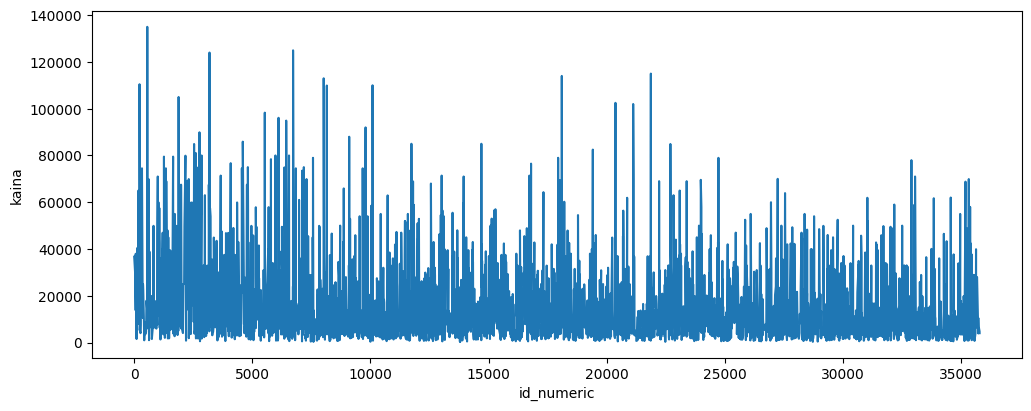

In [ ]:
fig, axis = plt.subplots(figsize=(12, 4.5))
sns.lineplot(data=df[df['gamintojas'] == 'Audi'], x='id_numeric', y='kaina')
plt.show()